<a href="https://colab.research.google.com/github/skang0812/ML-Project-1/blob/main/project_1_bsds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1

The goal of the first project is to do some wrangling, EDA, and visualization, and generate sequences of values. We will focus on:

- CDC National Health and Nutritional Examination Survey (NHANES, 1999-2000): https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=1999
- CDC Linked Mortality File (LMF, 1999-2000): https://www.cdc.gov/nchs/data-linkage/mortality-public.htm

NHANES is a rich panel dataset on health and behavior, collected bi-yearly from around 1999 to now. We will focus on the 1999 wave, because that has the largest follow-up window, providing us with the richest mortality data. The mortality data is provided by the CDC Linked Mortality File.

The purpose of the project is to use $k$-NN to predict who dies (hard or soft classification) and how long they live (regression).

### Part 1: Wrangling and EDA (40/100 pts)

First, go to the NHANES and LMF web sites and familiarize yourself with the data sources. Download codebooks. Think about what resources are available. The CDC Linked Mortality File is somewhat of a pain to work with, so I have pre-cleaned it for you. It is available at httts://github.com/ds4e/undergraduate_ml_assignments in the data folder, as `lmf_parsed.cav`. From the CDC LMF web page, get the SAS program to load the data; it is the real codebook.

Second, download the demographic data for the 1999--2000 wave from the NHANES page. You can use the following code chunk to merge the LMF and DEMO data:

``` python
import pandas as pd
mdf = pd.read_csv('linked_mortality_file_1999_2000.csv') # Load mortality file
print( mdf.head() )
gdf = pd.read_sas("DEMO.xpt", format="xport") # Load demographics file
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") # Merge mortality and demographics on SEQN variable
```

Third, the variables `ELIGSTAT`, `MORTSTAT`, `PERMTH_INT`, and `RIDAGEEX` are particularly important. Look them up in the documentation and clearly describe them. (5/100 pts.)

Second, the goal of the project is to use whatever demographic, behavioral, and health data you like to predict mortality (`MORTSTAT`) and life expectancy (`PERMTH_INT`). Go to the NHANES 1999--2000 web page and select your data and download it. Clearly explain your rationale for selecting these data. Use `.merge` to combine your data into one complete dataframe. Document missing values. (5/100 pts)

Third, do basic EDA and visualization of the key variables. Are any important variables skewed? Are there outliers? How correlated are pairs of variables? Do pairs of categorical variables exhibit interesting patterns in contingency tables? Provide a clear discussion and examination of the data and the variables you are interested in using. (20/100 pts)


### Part 2: $k$-NN classification/regression, write-up (50/100 pts)

Submit a notebook that clearly addresses the following, using code and markdown chunks:

1. Describe the data, particularly what an observation is and whether there are any missing data that might impact your analysis. Who collected the data and why? What known limitations are there to analysis? (10/100 pts)
2. Describe the variables you selected to predict mortality and life expectancy, and the rationale behind them. Analyze your variables using describe tables, kernel densities, scatter plots, and conditional kernel densities. Are there any patterns of interest to notice? (10/100 pts)
3. Using your variables to predict mortality using a $k$-Nearest Neighbor Classifier. Analyze its performance and explain clearly how you select $k$. (10/100 pts)
4. Using your variables to predict life expectancy using a $k$-Nearest Neighbor Regressor. Analyze its performance and explain clearly how you select $k$. (10/100 pts)
5. Describe how your model could be used for health interventions based on patient characteristics. Are there any limitations or risks to consider? (10/100 pts)

## Submission (10/100 pts)

Submit your work in a well-organized GitHub repo, where the code is appropriately commented and all members of the group have made significant contributions to the commit history. (10/100 pts)

In [1]:
#basically clones the data so the next codechunk runs
!git clone https://github.com/ds4e/undergrad_ml_assignments/ data-real

Cloning into 'data-real'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 49 (delta 14), reused 6 (delta 6), pack-reused 29 (from 2)
Receiving objects: 100% (49/49), 8.58 MiB | 12.05 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [2]:
#taken from codechunk above
import pandas as pd
mdf = pd.read_csv('/content/data-real/data/linked_mortality_file_1999_2000.csv') # Load mortality file
print( mdf.head() )
gdf = pd.read_sas("/content/data-real/data/DEMO.xpt", format="xport") # Load demographics file
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") # Merge mortality and demographics on SEQN variable


   SEQN  ELIGSTAT  MORTSTAT  UCOD_LEADING  DIABETES  HYPERTEN  PERMTH_INT  \
0     1         2       NaN           NaN       NaN       NaN         NaN   
1     2         1       1.0           6.0       0.0       0.0       177.0   
2     3         2       NaN           NaN       NaN       NaN         NaN   
3     4         2       NaN           NaN       NaN       NaN         NaN   
4     5         1       0.0           NaN       NaN       NaN       244.0   

   PERMTH_EXM  
0         NaN  
1       177.0  
2         NaN  
3         NaN  
4       244.0  
   SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDAGEEX  \
0   1.0       1.0       2.0       2.0       2.0       2.0      29.0      31.0   
1   2.0       1.0       2.0       2.0       1.0      77.0     926.0     926.0   
2   3.0       1.0       2.0       1.0       2.0      10.0     125.0     126.0   
3   4.0       1.0       2.0       2.0       1.0       1.0      22.0      23.0   
4   5.0       1.0       2.0       2.

Third, the variables `ELIGSTAT`, `MORTSTAT`, `PERMTH_INT`, and `RIDAGEEX` are particularly important. Look them up in the documentation and clearly describe them. (5/100 pts.)

Pulled directly from the documentation.

**ELIGSTAT:**
Eligibility Status for Mortality Follow-up

Survey participants are defined as ineligible for linkage if they had
insufficient identifying data to create a SURVEY submission record.
Please note that all survey participants are included on the linked
SURVEY files regardless of linkage eligibility

**MORTSTAT:**
Final Mortality Status

Blank values imply linkage ineligibility. The MORTSTAT variable is
NCHS’s final determination of vital status and should be used as an
outcome variable and to calculate survival. Codes are assigned
depending on eligiblity and vital status.

**PERMTH_INT:**
Number of Person Months of
Follow-up from NHANES interview
date

Number of person-months of follow-up from NHANES interview date.
Participants who are assumed alive are assigned the number of person months
at the end of the mortality period, December 31, 2019. Only applicable for
NHANES III and continuous NHANES (1999-2018)


**RIDAGEEX:**
Exam Age in Months - Recode

Best age in months at date of examination for individuals under 85 years of age at screening.


Second, the goal of the project is to use whatever demographic, behavioral, and health data you like to predict mortality (`MORTSTAT`) and life expectancy (`PERMTH_INT`). Go to the NHANES 1999--2000 web page and select your data and download it. Clearly explain your rationale for selecting these data. Use `.merge` to combine your data into one complete dataframe. Document missing values. (5/100 pts)

WE PROBABLY WANT A BUNCH OF THEM (so our model is more right)

In [3]:
#Gather data from our repo to do stuff with
!git clone https://github.com/skang0812/ML-Project-1 heal_data

Cloning into 'heal_data'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 63 (delta 25), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 3.75 MiB | 3.34 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [4]:
#convert all the files into pandas files
#might not need all for now (but we have alot of data to use)
#https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Laboratory&Cycle=1999-2000 scroll through to see the dif data
import pandas as pd
alq = pd.read_sas('/content/heal_data/myfolder/ALQ.xpt', format ="xport")  #alchol use
print(alq.head())
bmx = pd.read_sas('/content/heal_data/myfolder/BMX.xpt', format ="xport") #body mesures
print(bmx.head())
bpq = pd.read_sas('/content/heal_data/myfolder/BPQ.xpt', format ="xport") #blood pressure and chelstor
print(bpq.head())
ciqmdep = pd.read_sas('/content/heal_data/myfolder/CIQMDEP.xpt', format ="xport") #depression
print(ciqmdep.head())
cvx = pd.read_sas('/content/heal_data/myfolder/CVX.xpt', format ="xport") #cardiboaslucte fitness
print(cvx.head())
dbq = pd.read_sas('/content/heal_data/myfolder/DBQ.xpt', format ="xport") #diet behior and neturtion
print(dbq.head())
diq = pd.read_sas('/content/heal_data/myfolder/DIQ.xpt', format ="xport") #diebietst
print(diq.head())
drxtot = pd.read_sas('/content/heal_data/myfolder/DRXTOT.xpt', format ="xport") #total nuterint intake
print(drxtot.head())
duq = pd.read_sas('/content/heal_data/myfolder/DUQ.xpt', format ="xport") #drug use
imq = pd.read_sas('/content/heal_data/myfolder/IMQ.xpt', format ="xport") #immunazation
print(imq.head())
ohxdent = pd.read_sas('/content/heal_data/myfolder/OHXDENT.xpt', format ="xport")  #oral health
print(ohxdent.head())
paq = pd.read_sas('/content/heal_data/myfolder/PAQ.xpt', format ="xport") #physchial activity
print(paq.head())
smq = pd.read_sas('/content/heal_data/myfolder/SMQ.xpt', format ="xport") #Smoking/tobcae use adult
print(smq.head())


   SEQN  ALQ100  ALQ110  ALQ120Q  ALQ120U  ALQ130       ALQ140Q  ALQ140U  \
0   2.0     1.0     NaN     24.0      3.0     1.0  5.397605e-79      NaN   
1   5.0     1.0     NaN      4.0      1.0     3.0  1.200000e+01      3.0   
2   7.0     2.0     2.0      NaN      NaN     NaN           NaN      NaN   
3  10.0     1.0     NaN      6.0      3.0     1.0  5.397605e-79      NaN   
4  12.0     1.0     NaN      2.0      2.0     3.0  1.000000e+00      3.0   

   ALQ150  
0     2.0  
1     2.0  
2     NaN  
3     2.0  
4     1.0  
   SEQN  BMAEXLEN  BMAEXSTS  BMAEXCMT  BMXWT  BMIWT  BMXRECUM  BMIRECUM  \
0   1.0     289.0       1.0       NaN   12.5    3.0      93.2       NaN   
1   2.0     376.0       1.0       NaN   75.4    NaN       NaN       NaN   
2   3.0     199.0       1.0       NaN   32.9    NaN       NaN       NaN   
3   4.0     170.0       1.0       NaN   13.3    NaN      87.1       NaN   
4   5.0     277.0       1.0       NaN   92.5    NaN       NaN       NaN   

   BMXHEAD  BMIHEAD 

In [5]:
#merge the data frames on the patient number, can add or remove some later
df = df.merge(bmx, on="SEQN", how="left")   #Blood pressure
df = df.merge(smq, on="SEQN", how="left")   #Smokeing tobcase use
df = df.merge(alq, on="SEQN", how="left")   #alchol
df = df.merge(diq, on="SEQN", how="left")   #diebeits
df = df.merge(bpq, on="SEQN", how="left")   #blood presure and chelstor

In [6]:
#select spefcifc columns
selected_columns = [
    "SEQN",
    "RIDAGEEX",
    "RIAGENDR",
    "RIDRETH1",
    "BMXBMI",
    "SMQ020",
    "ALQ100",
    "DIQ010",
    "BPQ020",
    "MORTSTAT",
    "PERMTH_INT"
]

df = df[selected_columns]
print(df.shape)

(9965, 11)


We selected BMI (BMXBMI), Smoking Status (SMQ020), Alcohol Use (ALQ100), Diabetes (DIQ010), and Blood Pressure (BPQ020) as predictors because they are clinically recognized risk factors for chronic diseases that drive mortality in the U.S. population. Including these metrics allows our $k$-NN model to move beyond simple demographic data to capture physiological and behavioral indicators that directly impact life expectancy (PERMTH_INT).

Skewness Analysis (0 is normal):
RIDAGEEX      0.123000
BMXBMI        1.113022
PERMTH_INT   -1.734140
dtype: float64


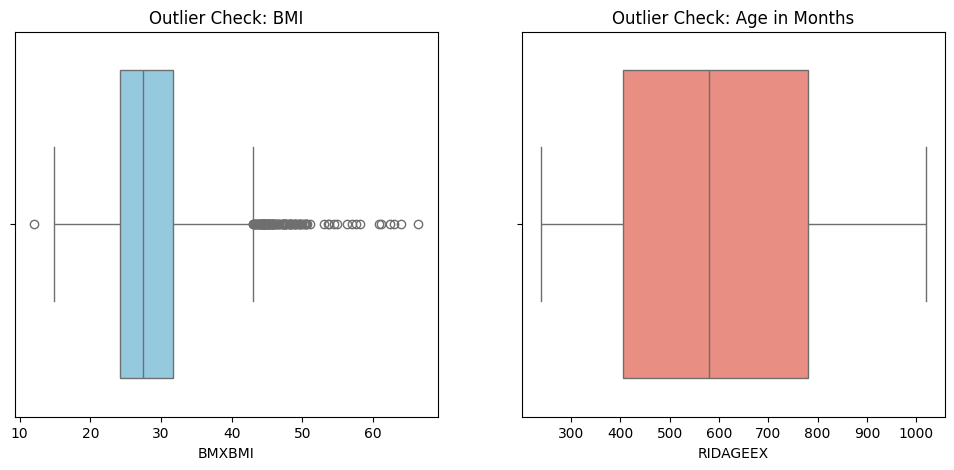

In [10]:
#check skewness for continuous variables
print("Skewness Analysis (0 is normal):")
print(df[['RIDAGEEX', 'BMXBMI', 'PERMTH_INT']].skew())

#visualize outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['BMXBMI'], color='skyblue')
plt.title('Outlier Check: BMI')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['RIDAGEEX'], color='salmon')
plt.title('Outlier Check: Age in Months')
plt.show()

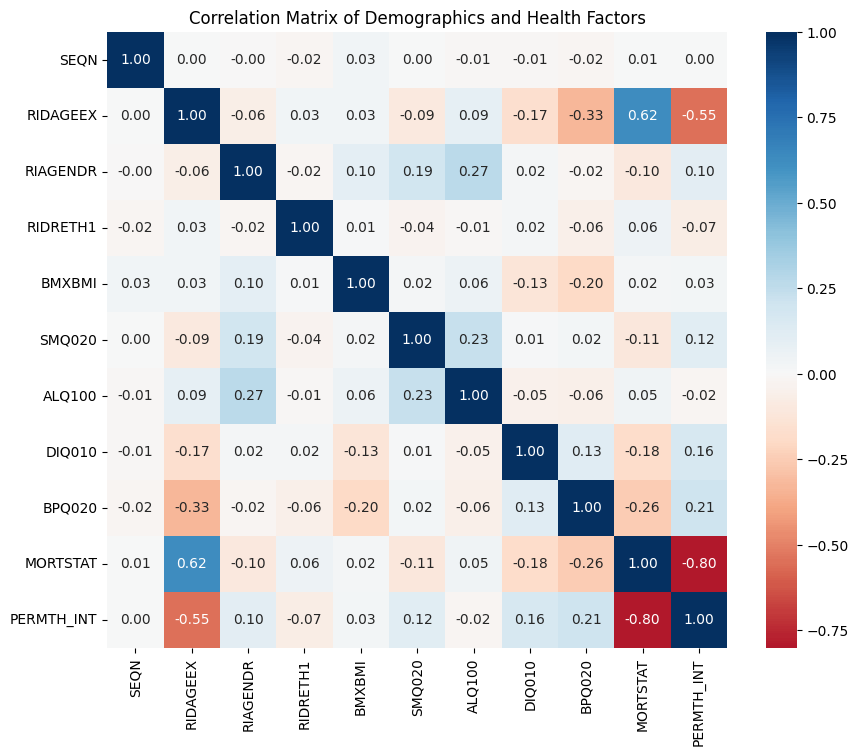

In [11]:
plt.figure(figsize=(10, 8))
#calculate the correlation matrix
corr_matrix = df.corr()

#plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0, fmt=".2f")
plt.title("Correlation Matrix of Demographics and Health Factors")
plt.show()

In [12]:
#smoking status vs mortality status
#1.0 = smoked 100+ cigarettes, 2.0 = did not
smoking_tab = pd.crosstab(df['SMQ020'], df['MORTSTAT'], normalize='index')
print("Smoking Status (SMQ020) vs Mortality (MORTSTAT):")
print(smoking_tab)

#diabetes status vs mortality status
#1.0 = yes, 2.0 = no
diabetes_tab = pd.crosstab(df['DIQ010'], df['MORTSTAT'], normalize='index')
print("\nDiabetes Status (DIQ010) vs Mortality (MORTSTAT):")
print(diabetes_tab)

#high blood pressure vs mortality status
#1.0 = yes, 2.0 = no
bp_tab = pd.crosstab(df['BPQ020'], df['MORTSTAT'], normalize='index')
print("\nHigh Blood Pressure (BPQ020) vs Mortality:")
print(bp_tab)

Smoking Status (SMQ020) vs Mortality (MORTSTAT):
MORTSTAT       0.0       1.0
SMQ020                      
1.0       0.629184  0.370816
2.0       0.752930  0.247070
9.0       0.666667  0.333333

Diabetes Status (DIQ010) vs Mortality (MORTSTAT):
MORTSTAT       0.0       1.0
DIQ010                      
1.0       0.347938  0.652062
2.0       0.735052  0.264948
3.0       0.404255  0.595745
9.0       0.500000  0.500000

High Blood Pressure (BPQ020) vs Mortality:
MORTSTAT       0.0       1.0
BPQ020                      
1.0       0.476793  0.523207
2.0       0.786023  0.213977
9.0       0.400000  0.600000


In [7]:
df = df.dropna(axis=1, how='all') #remove empty columns
print(df.isna().sum()) #still missing values, out of 9965 (so alot of them are at like 50>%(ish) missing data)


SEQN             0
RIDAGEEX       824
RIAGENDR         0
RIDRETH1         0
BMXBMI        1503
SMQ020        5088
ALQ100        5804
DIQ010         477
BPQ020        4014
MORTSTAT      4520
PERMTH_INT    4520
dtype: int64


In [8]:
#remove columns with no results
df = df.dropna(subset=['MORTSTAT', 'PERMTH_INT'])
print(df.shape)

(5445, 11)


In [9]:
df = df.dropna(subset=[ #remove any rows missing key predictors
    'RIDAGEEX',
    'BMXBMI',
    'SMQ020',
    'ALQ100',
    'DIQ010',
    'BPQ020'
])
print(df.isna().sum()) #basically than shows us all data that has been null or empty or had no result is gone

SEQN          0
RIDAGEEX      0
RIAGENDR      0
RIDRETH1      0
BMXBMI        0
SMQ020        0
ALQ100        0
DIQ010        0
BPQ020        0
MORTSTAT      0
PERMTH_INT    0
dtype: int64


EDIT IF NEEDED (double check what varibles rep on website)

We are currently interested in examining several variables, this includes alchol use (ALQ100), 12 drinks in this past year?, body mass index (BMXBMI), smoking (SMQ020) atleast 100 in your lifetime, having diabetes (DIQ010), having high blood pressure (BPQ020).

Our exploratory analysis confirms that the selected features have a meaningful relationship with mortality. RIDAGEEX and BMXBMI exhibit slight right-skewness, and BMI contains several outliers that represent significant biological variation relevant to mortality risk. The correlation heatmap highlights that Age (RIDAGEEX) is the strongest demographic predictor of mortality. Moreover, the contingency tables demonstrate that pre-existing conditions (specifically diabetes and high blood pressure) more than double the observed mortality rate in this sample. These insights provide a strong foundation for the $k$-NN classification and regression tasks we will implement in Part 2.